In [4]:
import os
import random
import torch
import scipy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go

from tools.data_setter import cifar_100_setter
from tools.generator import generate_sample_info
from models import cifar, imagenet
from collections import defaultdict
from plotly.subplots import make_subplots


from tools.visualize import *

In [9]:
device = torch.device('cuda:1')
teacher_epoch = "199"
student_epoch = "199"
teacher = cifar.WideResNet(depth=28, widen_factor=4, num_classes=100)
student = cifar.WideResNet(depth=28, widen_factor=1, num_classes=100)
filename = "./model_checkpoints/cifar100/None/wrn-28-4/alp_0.1_T_1.0/random_highest_1.0_random_highest_1.0_seed9999_none.t1"
#filename = './model_checkpoints/cifar100/None/wrn-28-4/alp_0.1_T_1.0/random_highest_1.0_random_highest_1.0_seed9999.t1'

student_path = './model_checkpoints/cifar100/wrn-28-4/wrn-28-1/alp_0.0_T_0.0/'
filename_students = os.listdir(student_path)

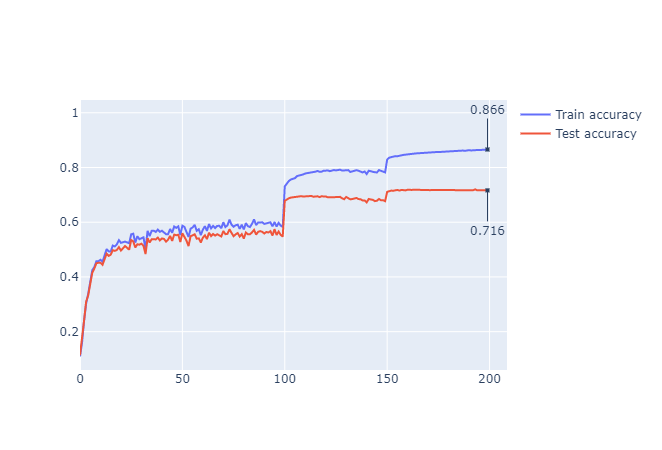

In [6]:
plot_accuracy(student_path)

In [10]:
# Load Dataframe
filename_student = os.path.join(student_path,filename_students[0])
teacher_df, student_df = get_dataframe(teacher,student, filename, filename_student, seed=0,nets=False)

Files already downloaded and verified
Files already downloaded and verified


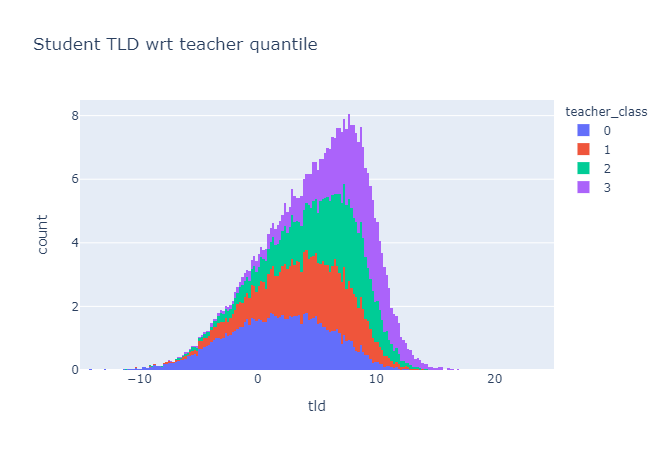

In [11]:
# Plot Quantile TLD
quantile_tld(teacher_df,student_df)

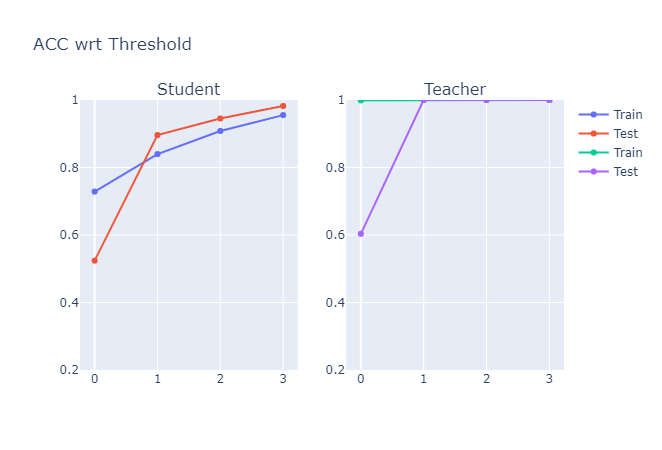

In [12]:
# Plot Accuracy per quantile
quantile_acc(teacher_df, student_df)